In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df= pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [32]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [34]:
#data cleaning
df['sex']= df['sex'].str.strip().str.lower()
df['smoker']=df['smoker'].str.strip().str.lower()
df['region']= df['region'].str.strip().str.lower()



In [35]:
#converting values that not nan to nan
df.replace(['','na','n/a','null'],np.nan,inplace=True)

# Check total missing values per column
df.isnull().sum().sort_values(ascending=False)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
#Handle numeric columns (int/float)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)    # Replaces missing values with median
    print(f"Filled missing values in {col} with median: {median_val}")

#Handle categorical columns (object/string)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)      # Replaces missing values with most frequent value
    print(f"Filled missing values in {col} with mode: {mode_val}")

Filled missing values in age with median: 39.0
Filled missing values in bmi with median: 30.4
Filled missing values in children with median: 1.0
Filled missing values in charges with median: 9382.033
Filled missing values in sex with mode: male
Filled missing values in smoker with mode: no
Filled missing values in region with mode: southeast


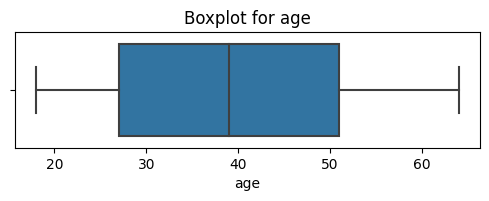

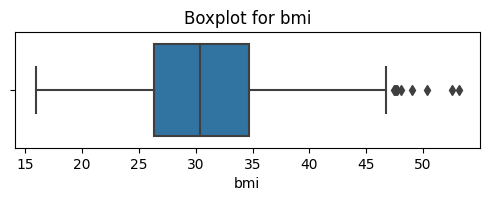

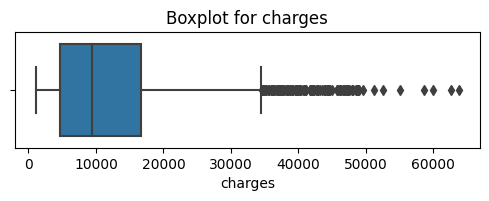

In [37]:
features = ['age', 'bmi', 'charges']

for col in features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [38]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_size = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_size - df.shape[0]
    print(f"{removed} outliers removed from '{col}'")
    return df

# Remove outliers from key numeric features
for col in ['age', 'bmi', 'charges']:
    df = remove_outliers_iqr(df, col)


0 outliers removed from 'age'
9 outliers removed from 'bmi'
138 outliers removed from 'charges'


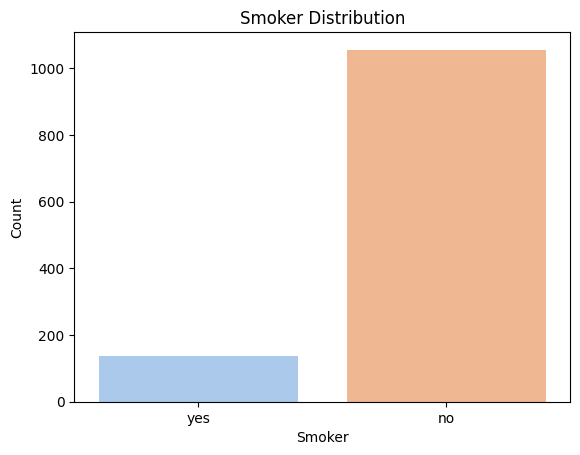

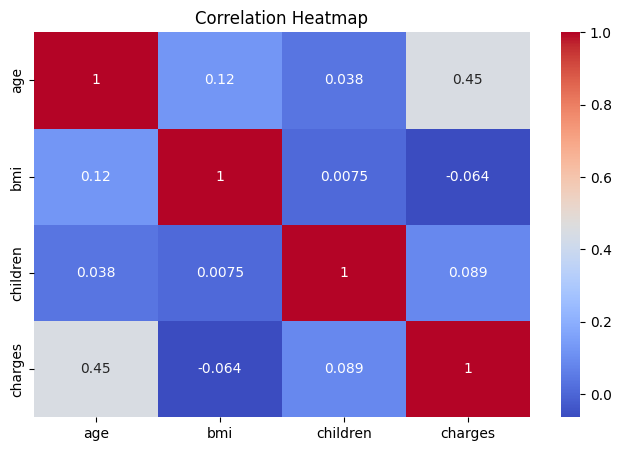

In [39]:
sns.countplot(x='smoker', data=df, palette='pastel')
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
corr = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


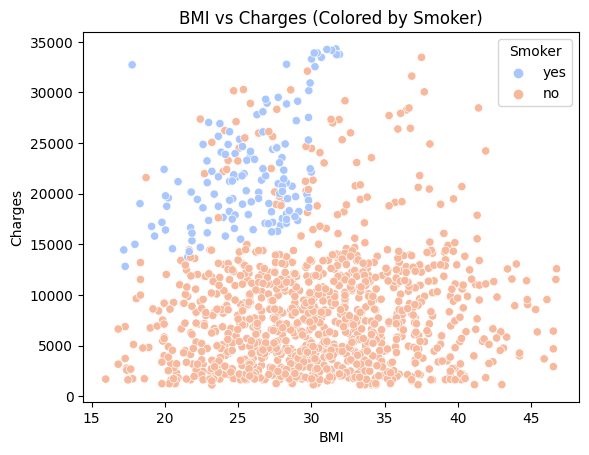

In [40]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='coolwarm')
plt.title('BMI vs Charges (Colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


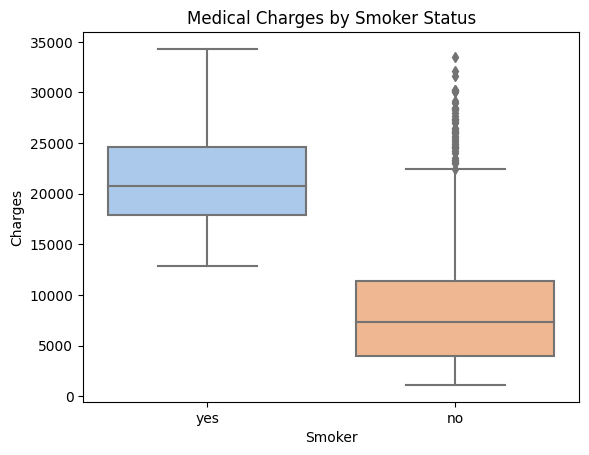

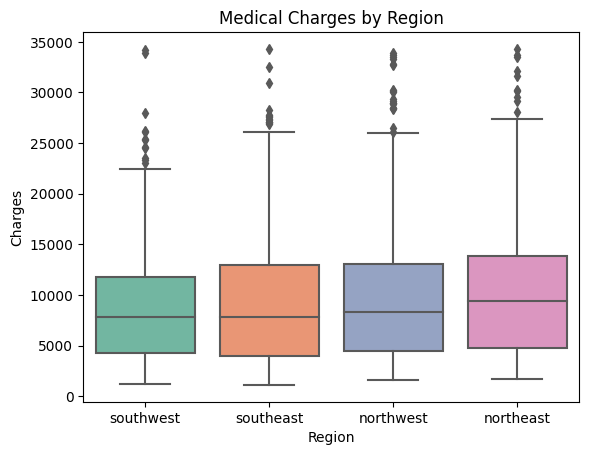

In [41]:
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')
plt.title('Medical Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

sns.boxplot(x='region', y='charges', data=df, palette='Set2')
plt.title('Medical Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

In [42]:
# Save cleaned dataset to CSV
df.to_csv("cleaned_insurance_data.csv", index=False)
print("Cleaned dataset saved")


Cleaned dataset saved
